In [1]:
import numpy as np
import numpy.polynomial.laguerre as geek
import numba as nb
import matplotlib.pyplot as plt
import ODESolve as ODE
import ODESolve_slow as ODEslow
import derivatives as der

In [6]:
N=100
Emax= 10
dm2= 2.5*10**-15
th= .5*np.arcsin(.8)
T= .75                  # T= (k/2650.89)^.25
cT= 0

Eval= np.linspace(Emax/N, Emax, N)


ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]
    
    

ym0_bar= np.zeros((N,4))
for i in range(len(ym0_bar)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0_bar[i,:]= [p0,0,0,1]
    
    
p= np.zeros(N+5)
p[-1]= dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)
p[-3]= T
p[-4]= cT
p[-5]= -1

In [7]:
bigy= der.newarray_maker(ym0, ym0_bar)
y0, y0_bar= der.newmatrix_maker(bigy)
print(bigy.shape, y0.shape, y0_bar.shape)

(800,) (100, 4) (100, 4)


In [8]:
initial= der.dndE(y0, Eval)
initial_bar= der.dndE(y0_bar, Eval)
print(Eval.shape, initial.shape, initial_bar.shape)

(100,) (100,) (100,)


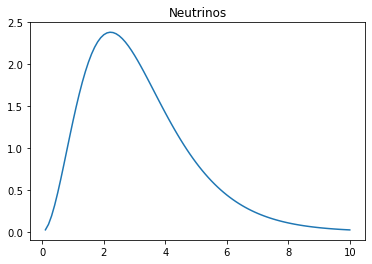

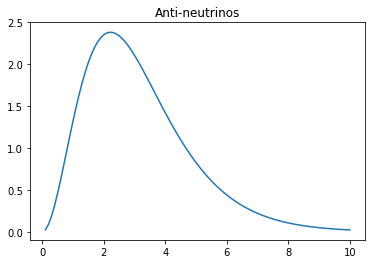

In [9]:
plt.figure()
plt.plot(Eval, initial)
plt.title("Neutrinos")
plt.show()

plt.figure()
plt.plot(Eval, initial_bar)
plt.title("Anti-neutrinos")
plt.show()

T = 0.5 MeV; only neutrinos (no anti-neutrinos; we solve for model with both neutrinos and anti-neutrinos, but we set the anti-neutrinos to zero)... we see collective oscillations as expected

In [36]:
%%time
N=100
Emax= 10
dm2= 2.5*10**-15
th= .5*np.arcsin(.8)
T= .5                  # T= (k/2650.89)^.25
cT= 0

Eval= np.linspace(Emax/N, Emax, N)


ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]
    
    

ym0_bar= np.zeros((N,4))
for i in range(len(ym0_bar)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0_bar[i,:]= [p0,0,0,1]
    
    
p= np.zeros(N+5)
p[-1]= dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)
p[-3]= T
p[-4]= cT
p[-5]= -1

y0= der.newarray_maker(ym0, np.zeros((N,4)))
t0= 0
dt0=  0.01/np.max(np.abs(der.f(t0,y0,p)))
N_step = 100              
dN = 100
tau_final=10
t_final = tau_final*2*2.2*T/dm2


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

CPU times: user 8.53 s, sys: 18.2 ms, total: 8.55 s
Wall time: 8.54 s


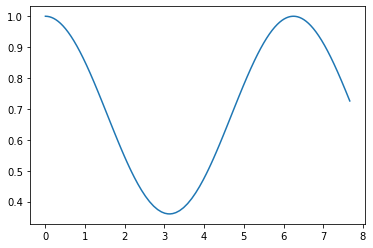

In [37]:
probability= der.probability(ym0, Eval, t, y[:, :4*N])

plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability)
plt.show()

Now with only anti-neutrinos, collective oscilations again

In [38]:
%%time
N=100
Emax= 10
dm2= 2.5*10**-15
th= .5*np.arcsin(.8)
T= .5                  # T= (k/2650.89)^.25
cT= 0

Eval= np.linspace(Emax/N, Emax, N)


ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]
    
    

ym0_bar= np.zeros((N,4))
for i in range(len(ym0_bar)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0_bar[i,:]= [p0,0,0,1]
    
    
p= np.zeros(N+5)
p[-1]= dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)
p[-3]= T
p[-4]= cT
p[-5]= -1

y0= der.newarray_maker(np.zeros((N,4)), ym0_bar)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(t0,y0,p)))
N_step = 100              
dN = 100
tau_final=10
t_final = tau_final*2*2.2*T/dm2


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

CPU times: user 8.7 s, sys: 16.2 ms, total: 8.72 s
Wall time: 8.71 s


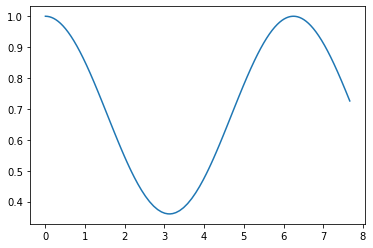

In [39]:
probability= der.probability(ym0_bar, Eval, t, y[:, 4*N:])

plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability)
plt.show()

Now, T = 0.3 MeV, a thermal distribution of neutrinos and anti-neutrinos, initially all $\nu_e$ and $\bar\nu_e$ (no $\nu_\mu$ and no $\bar\nu_\mu$).  The oscillations aren't sinusoidal, they're skinnier

In [40]:
%%time
N=100
Emax= 10
dm2= 2.5*10**-15
th= .5*np.arcsin(.8)
T= .3                  # T= (k/2650.89)^.25
cT= 0

Eval= np.linspace(Emax/N, Emax, N)


ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]
    
    

ym0_bar= np.zeros((N,4))
for i in range(len(ym0_bar)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0_bar[i,:]= [p0,0,0,1]
    
    
p= np.zeros(N+5)
p[-1]= dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)
p[-3]= T
p[-4]= cT
p[-5]= -1

y0= der.newarray_maker(ym0, ym0_bar)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(t0,y0,p)))
N_step = 100              
dN = 10
tau_final=10
t_final = tau_final*2*2.2*T/dm2


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

CPU times: user 909 ms, sys: 1.96 ms, total: 911 ms
Wall time: 910 ms


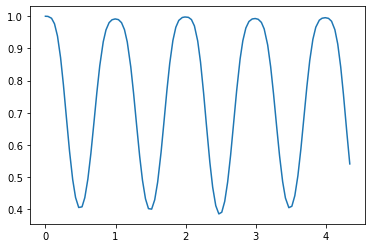

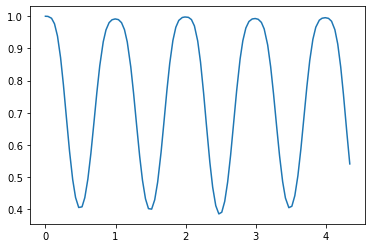

In [41]:
probability= der.probability(ym0, Eval, t, y[:, :4*N])

plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability)
plt.show()

probability_bar= der.probability(ym0_bar, Eval, t, y[:, 4*N:])

plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability_bar)
plt.show()

Now something weird, as described in the Synchronized Oscillations paper, in an "inverted hierarchy", $\Delta m^2$ is negative, and the oscillations are now weird.

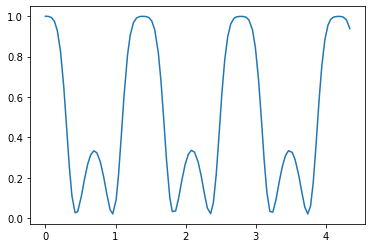

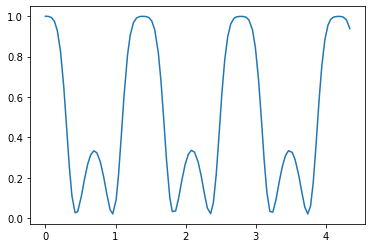

CPU times: user 1.09 s, sys: 9.77 ms, total: 1.1 s
Wall time: 1.1 s


In [42]:
%%time
N=100
Emax= 10
dm2= 2.5*10**-15
th= .5*np.arcsin(.8)
T= .3                  # T= (k/2650.89)^.25
cT= 0

Eval= np.linspace(Emax/N, Emax, N)


ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]
    
    

ym0_bar= np.zeros((N,4))
for i in range(len(ym0_bar)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0_bar[i,:]= [p0,0,0,1]
    
    
p= np.zeros(N+5)
p[-1]= - dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)
p[-3]= T
p[-4]= cT
p[-5]= -1

y0= der.newarray_maker(ym0, ym0_bar)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(t0,y0,p)))
N_step = 100              
dN = 10
tau_final=10
t_final = tau_final*2*2.2*T/dm2

t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

probability= der.probability(ym0, Eval, t, y[:, :4*N])

plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability)
plt.show()

probability_bar= der.probability(ym0_bar, Eval, t, y[:, 4*N:])

plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability_bar)
plt.show()

Back to normal hierarchy, but we start fully $\nu_e$ and fully $\bar\nu_\mu$.  There are only really tiny oscillations.  The probability for the anti-neutrinos is undefined because the initial distribution of $\bar\nu_e$ is zero, so it cannot be calculated in this way.

In [45]:
%%time
N=100
Emax= 10
dm2= 2.5*10**-15
th= .5*np.arcsin(.8)
T= .5                  # T= (k/2650.89)^.25
cT= 0

Eval= np.linspace(Emax/N, Emax, N)


ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]
    
    

ym0_bar= np.zeros((N,4))
for i in range(len(ym0_bar)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0_bar[i,:]= [p0,0,0,-1]
    
    
p= np.zeros(N+5)
p[-1]= dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)
p[-3]= T
p[-4]= cT
p[-5]= -1

y0= der.newarray_maker(ym0, ym0_bar)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(t0,y0,p)))
N_step = 100              
dN = 10
tau_final=10
t_final = tau_final*2*2.2*T/dm2


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)



CPU times: user 954 ms, sys: 1.89 ms, total: 956 ms
Wall time: 955 ms


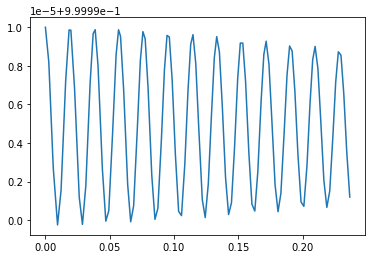

ZeroDivisionError: division by zero

In [46]:
probability= der.probability(ym0, Eval, t, y[:, :4*N])

plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability)
plt.show()

probability_bar= der.probability(ym0_bar, Eval, t, y[:, 4*N:])

plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability_bar)
plt.show()